<a href="https://colab.research.google.com/github/JuliethLopez/dlaicoursePractica/blob/master/11_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Single Layer LSTM
To solving the lack of structure between subword tokens we'll use LSTM, that is only one of the RNN (recurrent neural networks) that we can use.

In [3]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow_datasets as tfds
import tensorflow as tf
print(tf.__version__)

2.2.0


In [4]:
# Get the data
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteF76QE6/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteF76QE6/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteF76QE6/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [5]:
tokenizer = info.features['text'].encoder

In [6]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset = test_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_dataset))

In [7]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          523840    
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               66048     
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 598,209
Trainable params: 598,209
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [10]:
NUM_EPOCHS = 10
history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 62s 158ms/step - loss: 0.5353 - accuracy: 0.7343 - val_loss: 0.4932 - val_accuracy: 0.7806
Epoch 2/10
391/391 [==============================] - 62s 157ms/step - loss: 0.4261 - accuracy: 0.8161 - val_loss: 0.4307 - val_accuracy: 0.8300
Epoch 3/10
391/391 [==============================] - 63s 160ms/step - loss: 0.3451 - accuracy: 0.8692 - val_loss: 0.4060 - val_accuracy: 0.8299
Epoch 4/10
391/391 [==============================] - 63s 161ms/step - loss: 0.2859 - accuracy: 0.8921 - val_loss: 0.4191 - val_accuracy: 0.8126
Epoch 5/10
391/391 [==============================] - 63s 161ms/step - loss: 0.4898 - accuracy: 0.7528 - val_loss: 0.5821 - val_accuracy: 0.7151
Epoch 6/10
391/391 [==============================] - 63s 160ms/step - loss: 0.4480 - accuracy: 0.8036 - val_loss: 0.4435 - val_accuracy: 0.8208
Epoch 7/10
391/391 [==============================] - 62s 159ms/step - loss: 0.2571 - accuracy: 0.9014 - val_loss: 0.3906 - val_ac

In [11]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

It seems that this model didn't improve the results.

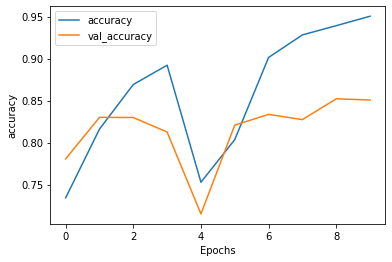

In [12]:
plot_graphs(history, 'accuracy')

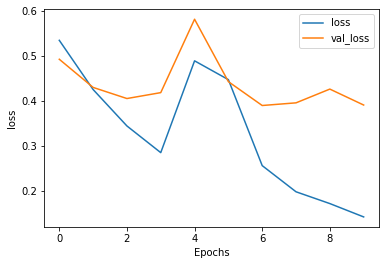

In [13]:
plot_graphs(history, 'loss')

# Multiple layer LSTM
The spikes in the curves can indicate that the model needs changes in its structure. Using more LSTM layers we can obtain a smother curve.


In [14]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 64)          523840    
_________________________________________________________________
bidirectional_1 (Bidirection (None, None, 128)         66048     
_________________________________________________________________
bidirectional_2 (Bidirection (None, 64)                41216     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 635,329
Trainable params: 635,329
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [17]:
NUM_EPOCHS = 10
history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 108s 276ms/step - loss: 0.5631 - accuracy: 0.7028 - val_loss: 0.5773 - val_accuracy: 0.7399
Epoch 2/10
391/391 [==============================] - 109s 278ms/step - loss: 0.5638 - accuracy: 0.7264 - val_loss: 0.6563 - val_accuracy: 0.6146
Epoch 3/10
391/391 [==============================] - 108s 276ms/step - loss: 0.5934 - accuracy: 0.6825 - val_loss: 0.7481 - val_accuracy: 0.6318
Epoch 4/10
391/391 [==============================] - 109s 278ms/step - loss: 0.5372 - accuracy: 0.7272 - val_loss: 0.6107 - val_accuracy: 0.6834
Epoch 5/10
391/391 [==============================] - 106s 272ms/step - loss: 0.4338 - accuracy: 0.8065 - val_loss: 0.4376 - val_accuracy: 0.8103
Epoch 6/10
391/391 [==============================] - 105s 269ms/step - loss: 0.3073 - accuracy: 0.8767 - val_loss: 0.3942 - val_accuracy: 0.8332
Epoch 7/10
391/391 [==============================] - 104s 265ms/step - loss: 0.2590 - accuracy: 0.9003 - val_loss: 0.3929 -

In [18]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

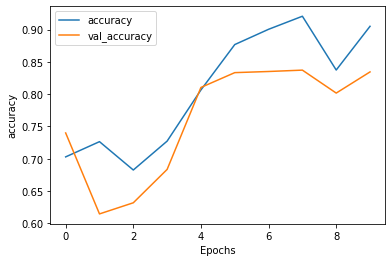

In [19]:
plot_graphs(history, 'accuracy')

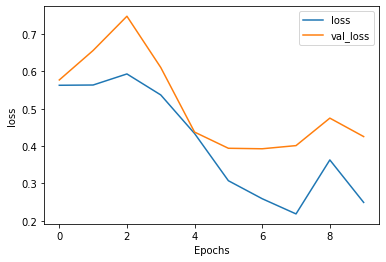

In [20]:
plot_graphs(history, 'loss')

# 1 convolutional layer

In [21]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [22]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 64)          523840    
_________________________________________________________________
conv1d (Conv1D)              (None, None, 128)         41088     
_________________________________________________________________
global_average_pooling1d (Gl (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 573,249
Trainable params: 573,249
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [24]:
NUM_EPOCHS = 10
history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 37s 95ms/step - loss: 0.4698 - accuracy: 0.7625 - val_loss: 0.3112 - val_accuracy: 0.8789
Epoch 2/10
391/391 [==============================] - 19s 49ms/step - loss: 0.2270 - accuracy: 0.9154 - val_loss: 0.3010 - val_accuracy: 0.8796
Epoch 3/10
391/391 [==============================] - 17s 43ms/step - loss: 0.1745 - accuracy: 0.9381 - val_loss: 0.3142 - val_accuracy: 0.8760
Epoch 4/10
391/391 [==============================] - 16s 41ms/step - loss: 0.1394 - accuracy: 0.9517 - val_loss: 0.3516 - val_accuracy: 0.8726
Epoch 5/10
391/391 [==============================] - 16s 40ms/step - loss: 0.1130 - accuracy: 0.9612 - val_loss: 0.4186 - val_accuracy: 0.8606
Epoch 6/10
391/391 [==============================] - 15s 39ms/step - loss: 0.0922 - accuracy: 0.9696 - val_loss: 0.4960 - val_accuracy: 0.8587
Epoch 7/10
391/391 [==============================] - 15s 40ms/step - loss: 0.0746 - accuracy: 0.9755 - val_loss: 0.5254 - val_accuracy:

In [25]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

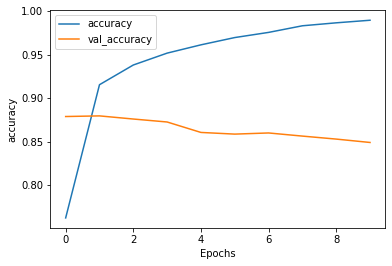

In [26]:
plot_graphs(history, 'accuracy')

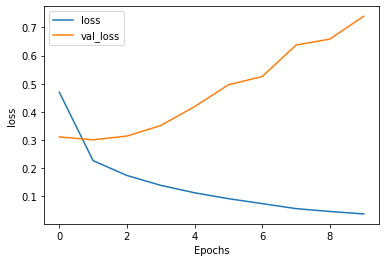

In [28]:
plot_graphs(history, 'loss')

# Gru layer

In [30]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(64)),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 64)          523840    
_________________________________________________________________
bidirectional_3 (Bidirection (None, 128)               49920     
_________________________________________________________________
dense_6 (Dense)              (None, 6)                 774       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 7         
Total params: 574,541
Trainable params: 574,541
Non-trainable params: 0
_________________________________________________________________


In [31]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 64)          523840    
_________________________________________________________________
bidirectional_3 (Bidirection (None, 128)               49920     
_________________________________________________________________
dense_6 (Dense)              (None, 6)                 774       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 7         
Total params: 574,541
Trainable params: 574,541
Non-trainable params: 0
_________________________________________________________________


In [32]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [33]:
NUM_EPOCHS = 10
history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 61s 156ms/step - loss: 0.6113 - accuracy: 0.6431 - val_loss: 0.5160 - val_accuracy: 0.7643
Epoch 2/10
391/391 [==============================] - 61s 155ms/step - loss: 0.4143 - accuracy: 0.8202 - val_loss: 0.4269 - val_accuracy: 0.8285
Epoch 3/10
391/391 [==============================] - 60s 154ms/step - loss: 0.3448 - accuracy: 0.8634 - val_loss: 0.4099 - val_accuracy: 0.8294
Epoch 4/10
391/391 [==============================] - 61s 155ms/step - loss: 0.2582 - accuracy: 0.9012 - val_loss: 0.3543 - val_accuracy: 0.8596
Epoch 5/10
391/391 [==============================] - 60s 154ms/step - loss: 0.1993 - accuracy: 0.9286 - val_loss: 0.3844 - val_accuracy: 0.8499
Epoch 6/10
391/391 [==============================] - 60s 154ms/step - loss: 0.1490 - accuracy: 0.9481 - val_loss: 0.4148 - val_accuracy: 0.8485
Epoch 7/10
391/391 [==============================] - 61s 155ms/step - loss: 0.1026 - accuracy: 0.9669 - val_loss: 0.4692 - val_ac

In [34]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

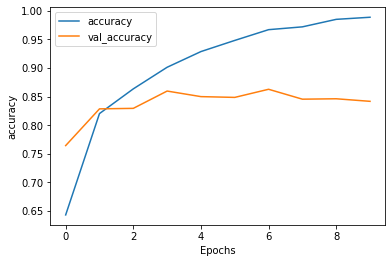

In [35]:
plot_graphs(history, 'accuracy')

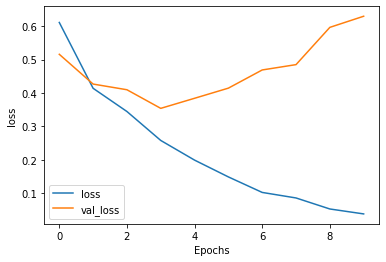

In [36]:
plot_graphs(history, 'loss')